# Numerical Mathematics - Project 1

## Candidate number: 10084

***
Systems of equations can be written on the form $A\boldsymbol{x}=\boldsymbol{y}$, where $A\in\mathbb{R}^{mxn}$, $\boldsymbol{x}\in\mathbb{R}^n$ and $\boldsymbol{y}\in\mathbb{R}^m$. If $m<n$, we say the system is underdetermined, meaning that we have less equations than we have unknowns. In order to solve such problems, there are several different approaches one can take. In this project, we will take a look at two of them: solving using a minimal norm approximation, where the goal is to minimize the norm $\|A\boldsymbol{x}-\boldsymbol{y}\|$, and Tikhonov regularization, where we also want the approximated $x$ to be as small as possible. In the final task, we use the implemented methods of solving such equations on a practical example; separating mixed images.

### Task 1)

We start off by looking at the minimal norm solution, where our goal is to minimize the norm of the difference between $A\boldsymbol{x}$ and $\boldsymbol{y}$, i.e.

$$
\underset{\boldsymbol{x}\in\mathbb{R}^n}{\text{arg min}}\hspace{0.1cm} \|Ax-y\|.
$$

First we look at some examples of what underdetermined linear systems of equations may look like and some properties of matrices involved in calculations, before we dive into methods of solving the minimizartion problem.

#### a)

Let us assume $A\in\mathbb{R}^{2\times 3}$, $\boldsymbol{x}\in\mathbb{R}^{3}$ and $\boldsymbol{y}\in\mathbb{R}^{2}$. The linear system of equations $Ax=y$ will (1) have no solutions if $\boldsymbol{y}$ is not in the column space of $A$, and will (2) have infinitely many solutions if $\boldsymbol{y}$ is in the column space of $A$. For example, the equation has no solutions if

$$
A = \begin{bmatrix}2&2&2 \\ 1&1&1 \end{bmatrix}, \boldsymbol{y}=\begin{bmatrix}3\\1\end{bmatrix}
$$

and there will be infinitely many solutions if 

$$
A = \begin{bmatrix}4&3&2 \\ 3&2&1 \end{bmatrix}, \boldsymbol{y}=\begin{bmatrix}2\\1\end{bmatrix}.
$$
***

#### b)

Now we look at the two matrices $A^TA$ and $AA^T$. By using the identity $(BC)^T=C^T B^T$, we get that $(A^TA)^T=A^T (A^T)^T=A^TA$, and similarly that $(AA^T)^T=(A^T)^TA^T=AA^T$. This means that the matrices $A^TA$ and $AA^T$ are symmetric.

By using that $\boldsymbol{x}^T\boldsymbol{x}=\|\boldsymbol{x}\|^2$, and the fact that a vector norm is non-negative, we can prove that these two matrices are positive semi-definite, i.e., $\boldsymbol{x}^T A^T A \boldsymbol{x}\geq 0$ and $\boldsymbol{x}^T A A^T \boldsymbol{x}\geq 0$.

$$
\boldsymbol{x}^T A^T A \boldsymbol{x}=(A\boldsymbol{x})^T A\boldsymbol{x}=\|A\boldsymbol{x}\|^2\geq 0. \quad \square
$$

Similarly, 

$$
\boldsymbol{x}^T AA^T \boldsymbol{x}=(A^T\boldsymbol{x})^T A^T\boldsymbol{x}=\|A^T\boldsymbol{x}\|^2\geq 0. \quad \square
$$

Now we assume that $A$ has full rank, i.e. $rank(A)=m$. If we can prove that $rank(A^TA)=rank(AA^T)=rank(A)$, we can make further conclusions about the invertibility of $A^TA$ and $AA^T$. We start by looking at a vector $\boldsymbol{x}\in Null(A)$, where $Null(A)$ is the nullspace of $A$.

$$
A\boldsymbol{x}=0\Rightarrow A^TA\boldsymbol{x}=0\Rightarrow \boldsymbol{x}\in Null(A^TA)\subseteq Null(A)
$$

The other way around, for a vector $\boldsymbol{x}\in Null(A^TA)$, we get

$$
A^TA\boldsymbol{x}=0\Rightarrow \boldsymbol{x}^TA^TA\boldsymbol{x}=0\Rightarrow (A\boldsymbol{x})^TA\boldsymbol{x}=0\Rightarrow A\boldsymbol{x}=0\Rightarrow Null(A)\subseteq Null(A^TA)
$$

Hence we get that 

$$
Null(A)=Null(A^TA)\\
dim(Null(A))=dim(Null(A^TA))\\
rank(A)=rank(A^TA)
$$

Similarly, by substituting $A^T$ for $A$, we get that $rank(A^T)=rank(AA^T)$. We know that $rank(A^T)=rank(A)$, and thus we have proven that $rank(A^TA)=rank(AA^T)=rank(A)=m$. Since $A^TA\in\mathbb{R}^{n\times n}$ and $AA^T\in\mathbb{R}^{m\times m}$, where $m<n$, we can conclude that $AA^T$ has full rank, while $A^TA$ does not. Thus, $AA^T$ is invertible and $A^TA$ is not.
***

#### c)

Now we move on to solving the minimization problem, 

$$
\underset{\boldsymbol{x}\in\mathbb{R}^n}{\text{arg min}}\hspace{0.1cm} \|Ax-y\|.
$$

The Lagrange function of the problem is

$$
\mathcal{L}(\boldsymbol{x},\boldsymbol{\lambda})=\boldsymbol{x}^T\boldsymbol{x} + \boldsymbol{\lambda}^T(A\boldsymbol{x}-\boldsymbol{y}).
$$

From this we can solve for $x_{min}$, which satisfies

$$
\nabla_x \mathcal{L}(x_{min},\lambda)=\nabla_\lambda\mathcal{L}(x_{min},\lambda)=0.
$$

I find the gradients by using that $x^Tx=\|x\|^2=\sum_{i=1}^{n}x_i^2$, and that $\boldsymbol{\lambda}^T(A\boldsymbol{x}-\boldsymbol{y})=\sum_{j=0}^{n} \sum_{i=0}^{n} \lambda_j (a_{ji}x_i-y_i)$. This gives

$$
\nabla_x\mathcal{L}(\boldsymbol{x},\lambda)=2\boldsymbol{x}+A^T\lambda=0 \quad (1)
$$
and
$$
\nabla_\lambda\mathcal{L}(\boldsymbol{x},\lambda)=A\boldsymbol{x}-\boldsymbol{y}=0 \quad (2)
$$

Solving (1) for $\boldsymbol{x_{min}}$ and inserting into (2), gives

$$
\boldsymbol{x_{min}}=-\frac{A^T\lambda}{2}\Rightarrow A(-\frac{A^T\lambda}{2})-\boldsymbol{y}=0\Rightarrow \lambda=-2(AA^T)^{-1}\boldsymbol{y}.
$$

Combined with (1),

$$
\boldsymbol{x_{min}}=-\frac{A^T\lambda}{2}=-\frac{A^T (-2(AA^T)^{-1}\boldsymbol{y})}{2}=A^T(AA^T)^{-1}\boldsymbol{y}
$$

***

#### d)
Now we define the $QR$-decomposition of $A^T$ s.t. $A^T=QR$ and $A=R^TQ^T$. Inserting this into the expression for $\boldsymbol{x_{min}}$, and using that $Q$ is defined to be orthogonal, i.e. $Q^TQ=QQ^T=I$, we get that

$$
\boldsymbol{x_{min}}=QR(R^TQ^TQR)^{-1}\boldsymbol{y}=QR(R^TR)^{-1}\boldsymbol{y}=QRR^{-1}R^{-T}\boldsymbol{y}=QR^{-T}\boldsymbol{y}.
$$



In order to find the $QR$-decomposition, I implement the Gram-Schmidt method in `gram_schmidt()`.

In [1]:
import numpy as np
import scipy as sp
from scipy import linalg
import matplotlib.pyplot as plt

In [2]:
def gram_schmidt(A):
    """
    Performs Gram-Schmidt orthonormalization, returning QR=A
    Input:
        A: nxm (tall) matrix (n>m)
    Output:
        Q: Orthogonal matrix
        R: Upper triangular matrix
    """

    # Find n and m
    n,m = A.shape
    
    # Initialize Q and R as zero-matrices
    Q = np.zeros((m,n))
    R = np.zeros((m,m))
    
    A = A.T # Transpose to avoid slicing in the for-loop
    
    # Initialize first column in Q and R
    Q[0] = A[0]/sp.linalg.norm(A[0], 2)
    R[0,0] = np.inner(A[0],Q[0])
    
    # Fill in Q and R iteratively using the Gram-Schmidt algorithm
    for k in range(1, m):
        u_k = A[k].astype(np.float64)
        for j in range(0, k):
            r = np.inner(A[k],Q[j])
            R[j,k] = r
            u_k -= r*Q[j].astype(np.float64)
            
        q_k = u_k / sp.linalg.norm(u_k,2)
        Q[k] = q_k
        R[k,k] = np.inner(A[k],Q[k])
    
    return Q.T, R

***

#### e)
Now that we have the $QR$-decomposition, we want to calculate $\boldsymbol{x_{min}}$. Calculating the inverse of $R^T$, however, requires heavy computations, and to avoid this we exploit that $R^T$ is lower triangular and that $Q$ is orthogonal. Backwards substitution gives

$$
\boldsymbol{x_{min}}=QR^{-T}\boldsymbol{y}\Rightarrow R^T Q^T\boldsymbol{x_{min}}=\boldsymbol{y}, Q^T \boldsymbol{x_{min}} = \boldsymbol{z} \Rightarrow R^T \boldsymbol{z}=\boldsymbol{y}.
$$

Since $R^T$ is lower triangular, these computations are easy. We first solve for $\boldsymbol{z}$ in the final equation, and use $\boldsymbol{x_{min}}=Q\boldsymbol{z}$ to calculate $\boldsymbol{x_{min}}$. This is implemented in the function `solve_QR()` below.

In [3]:
def solve_QR(Q, R, y):
    """
    Solves a QR-decompositioning for x
    Input:
        Q: Orthogonal (mxn)-matrix
        R: Upper triangular (mxm)-matrix
        y: n-dimensional vector
    Output:
        x_min, an approximated solution to the minimization problem
    """
    
    z = sp.linalg.solve_triangular(R.T, y, lower=True)
    return Q@z

***
#### f)

To test the implemented method of solving $\boldsymbol{y}=A\boldsymbol{x}$ using $QR$-decomposition, we compare it to Scipy's function `scipy.linalg.solve()`. First we include the given code to generate a random mxn-matrix $A$, as well as code to create a set of $N=100$ random x- and y-vectors that satisfy $\boldsymbol{y}=A\boldsymbol{x}$. The $x$ that we calculate will later be referred to as $x_{true}$, as this is a true solution to the equation.

In [4]:
def generate_A(m,n):
    """
    Generates m times n with correlated columns.
    Input:
        m: int, first dimension of A
        n: int, second dimension of A
    output:
        A: (m,n) array
    """

    cov_eigvecs = np.random.uniform(-1.0,1.0,(n,n))
    cov = cov_eigvecs.T @ cov_eigvecs
    v = np.sqrt(np.diag(cov))
    outer_v = np.outer(v, v)
    corr = cov / outer_v
    corr[cov == 0] = 0
    chol = sp.linalg.cholesky(corr, lower=True) 
    A = np.random.normal(0, 1.0,(m,n))
    A = np.dot(A,chol.T)
    return A

m = 2048
n = 8096
A = generate_A(m,n)

In [5]:
N = 100 # Number of test data we want to generate

# Generate solutions X columnwise, X[:,i] to access i-th vector
X = np.random.normal(0.0,1.0,(A.shape[1],N))

# Generate left hand sides Y columnwise Y[:,i] to access lhs
Y = np.dot(A,X)

# Doublecheck shapes
print(X.shape) # Expect (n,N)
print(Y.shape) # Expect (m,N)

(8096, 100)
(2048, 100)


When comparing the two methods, we first look at how long it takes to prepare the necessary matrices. To use `numpy.linalg.solve()` we need to prepare $AA^T$ (since Python calculates $A^T$ very fast, $AA^T$ is the main matrix of interest for our test), and to use `solve_QR()` we need to perform the $QR$-decomposition implemented in `gram_schmidt()`. We time each calculation using the `%%timeit`-command.

In [6]:
%%timeit -r 5
AAT = A@A.T

391 ms ± 30 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [7]:
%%timeit -r 5
Q,R = gram_schmidt(A.T)

37.9 s ± 3.24 s per loop (mean ± std. dev. of 5 runs, 1 loop each)


It is clear that calculating $AA^T$ is faster than performing a $QR$-decomposition. Whereas calculating $AA^T$ averages at about 400 ms, the $QR$-decomposition uses around 35 seconds. Next, we need to look at how long it takes to solve the equation $\boldsymbol{y}=A\boldsymbol{x}$ once the initial matrices are prepared. Since calculations using `numpy.linalg.solve()` performs an entire LU-decompositioning and forwards/backwards substitution, which we do not in `solve_QR()`, I expect `numpy.linalg.solve()` to be slower than `solve_QR()`.

In [8]:
AAT = A@A.T
Q,R = gram_schmidt(A.T)

In [9]:
%%timeit -r 5 -n 1
for y in Y.T:
    z = np.linalg.solve(AAT, y)
    x_min = A.T@z

16.4 s ± 604 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [10]:
%%timeit -r 5 -n 1
for y in Y.T:
    x_min = solve_QR(Q,R,y)

695 ms ± 44.2 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


As expected, solving $\boldsymbol{y}=A\boldsymbol{x}$ for $\boldsymbol{x}$ takes less time using the already computed $QR$-decomposition than using `scipy.linalg.solve()`. This implies that using the $QR$-decomposition is time-saving if we are to solve many equations using only one matrix $A$, as finding $Q$ and $R$ only has to be done once, whereas solving the equations are performed many times. On the contrary, if we are to solve few equations per matrix $A$, it is more time efficient to use `numpy.linalg.solve()`. 

In total, we see that the QR-decompositioning takes more time than NumPy to solve the 100 equations. Assuming that the time it takes per calculation stays the same, knowing that QR takes 35 seconds to decompose and 0.6 seconds to solve 100 equations, and calculating $AA^T$ takes 0.4 seconds and NumPy uses 14 seconds to solve, we can calculate that QR-decompositioning should take less time in total if we are to calculate more than $\sim 250$ equations of this size.

To test difference in accuracy, we can compare the norm $\|x_{min}-x_{true}\|$ for QR-decomposition and use of numpy, and see whether the norms are the same. We do so by saving all $x_{min}$ that we calculate and then plot the norms for the two methods, together. In the plot, I also include the norms of $x_{min}$ and $x_{true}$, so that we can see whether the solution we find is meaningful compared to $x_{true}$. I also print the first calculated norm for QR-decompositioning and NumPy, to make a quantitative comparison between the two.

In [11]:
# Calculate x for QR and numpy
x_QR = np.zeros((8096,100))
x_NP = np.zeros((8096,100))
for i, y in enumerate(Y.T):
    x_QR[:,i] = solve_QR(Q,R,y)
    z = np.linalg.solve(AAT, y)
    x_NP[:,i] = A.T@z

In [14]:
# Calculate norms
norm_num = np.arange(100)
norm_QR = []
norm_NP = []
norm_true = []
norm_min = []
for i in range(N):
    norm_QR.append(np.linalg.norm(x_QR[:,i]-X[:,i],2))
    norm_NP.append(np.linalg.norm(x_NP[:,i]-X[:,i],2))
    norm_true.append(np.linalg.norm(X[:,i]))
    norm_min.append(np.linalg.norm(x_QR[:,i]))

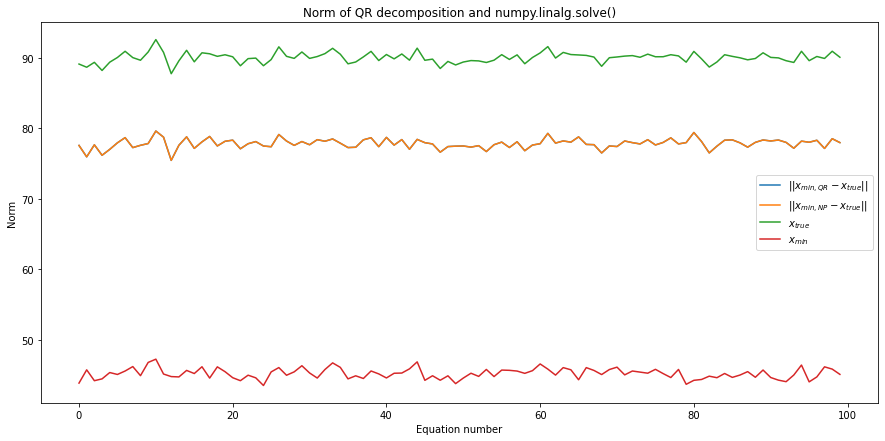

Norms of difference using QR:  77.55077699934321
Norms of difference using NP:  77.55077699934321


In [15]:
# Plot norms
plt.figure(figsize=(15,7))
plt.plot(norm_num, norm_QR)
plt.plot(norm_num, norm_NP)
plt.plot(norm_num, norm_true)
plt.plot(norm_num, norm_min)
plt.legend(["$\||x_{min, QR}-x_{true}\||$", "$\||x_{min, NP}-x_{true}\||$", "$x_{true}$", "$x_{min}$"])
plt.title("Norm of QR decomposition and numpy.linalg.solve()")
plt.xlabel("Equation number")
plt.ylabel("Norm")
plt.show()

print("Norms of difference using QR: ", norm_QR[0])
print("Norms of difference using NP: ", norm_NP[0])

We see that the norms we printed for QR and NumPy are identical, meaning that there is no difference in numerical accuracy for the two. This is true for all calculated solutions since the plotted norms are overlapping. Thus, both methods reach the same minimizer, which we can assume is the (uniquely) best solution to the problem.

What is also interesting to note is that the solution $x_{min}$ has a way lower norm than $x_{true}$, meaning that our calculated solution is a better solution to the minimal norm problem than $x_{true}$. If we were to guess a random solution for $x$, which we know is uniformly distributed between -1 and 1, guessing $x_{min} = \vec{0}$ would be the most logical guess, which would result in a difference in norm equal to the norm of $x_{true}$. Thus, we can conclude that we find a solution in a meaningful way, as $\|x_{min}-x_{true}\|$ is lower than $\|\vec{0}-x_{true}\|$.

***
### Task 2)

Now we switch from the minimal norm solution to Tikhonov regularisation, which involves solving the optimization problem

$$
\underset{\boldsymbol{x}\in\mathbb{R}^n}{\text{arg min}}\hspace{0.1cm} \|Ax-y\|+\mu\|x\|.
$$

Here, we add $\mu\|x\|$ to the minimization problem so that the problem not only is to find a solution of $Ax-y=0$, but also to have $x$ be as small as possible.


#### a)

Same as for the minimal norm solution, we know that a solution of the Tikhonov regularisation $T(\boldsymbol{x}) = \|A\boldsymbol{x}-\boldsymbol{y}\|^2+\mu\|\boldsymbol{x}\|^2$ satisfies $\nabla_xT(x)=0$. Thus, we need to calculate 

$$
\begin{aligned}
\nabla_xT(x)&=\nabla_x(\|A\boldsymbol{x}-\boldsymbol{y}\|^2+\mu\|\boldsymbol{x}\|^2)\\
&=\nabla_x(\|A\boldsymbol{x}-\boldsymbol{y}\|^2)+\nabla_x(\mu\|\boldsymbol{x}\|^2)\\
\end{aligned}
$$

We know from task 1 that $\nabla_x(\|\boldsymbol{x}\|^2)=2 \boldsymbol{x}$. By writing out $A\boldsymbol{x}-\boldsymbol{y}=\sum_{i=1}^{m}\sum_{j=1}^{n}(a_{ij}x_j-y_j)^2$, we see that 

$$
\frac{\partial}{\partial x_j}(A\boldsymbol{x}-\boldsymbol{y})=2\sum_{i=1}^{m}(a_{ij}^2x_j-y_j)\Rightarrow \nabla_x(\|A\boldsymbol{x}-\boldsymbol{y}\|^2)=2A^TA\boldsymbol{x}-2A^T\boldsymbol{y}.
$$

Hence, we get

$$
\nabla_xT(x)=\nabla_x(\|A\boldsymbol{x}-\boldsymbol{y}\|^2+\mu\|\boldsymbol{x}\|^2)=0\\
\Rightarrow 2A^TA\boldsymbol{x}-2A^T\boldsymbol{y}+2\mu\boldsymbol{x}=0\\
\Rightarrow 2A^TA\boldsymbol{x}+2\mu\boldsymbol{x}=2A^T\boldsymbol{y}\\
\Rightarrow (A^TA+\mu I)\boldsymbol{x}=A^T\boldsymbol{y}.
$$

This is the equation we use to solve for $\boldsymbol{x}$ when implementing code later on. However, to further simplify the equation and make calculations easier, we want to prove that $(A^TA+\mu I)$ is invertible. We know that a symmetric positive definite matrix (SPD) is invertible, so proving that $(A^TA+\mu I)$ is SPD is sufficient. First, we show that it is symmetric.

$$
(A^TA+\mu I)^T=(A^TA)^T+(\mu I)^T=A^TA+\mu I \qquad \square
$$

The matrix is SPD if $x^T(A^TA+\mu I)x>0$. To prove this we use that $\|Ax\|\geq0$, $\|x\|>0$ for $x\neq0$, and that $\mu>0$, which gives

$$
x^T(A^TA+\mu I)x = x^TA^TAx+x^T\mu Ix=(Ax)^TAx+\mu x^Tx=\|Ax\|+\mu \|x\|>0 \qquad \square
$$

Thus, $A^TA + \mu I$ is SPD and therefore also invertible.
***

#### b)
Inserting $A = U\Sigma V^T$ in $(A^TA+\mu I)\boldsymbol{x}=A^T\boldsymbol{y}$ gives:

$$
((U\Sigma V^T)^T(U\Sigma V^T)+\mu I)\boldsymbol{x}=(U\Sigma V^T)^T\boldsymbol{y}\\
(V\Sigma^T U^TU\Sigma V^T+\mu I)\boldsymbol{x}=V\Sigma^TU^T\boldsymbol{y}\\
$$

Since $U$ is unitary and real, we know that $U^TU=UU^T=I$. By the definition of SVD, we also know that $VV^T=I$, and that $V$ is invertible. Using the fact that for diagonal matrices $D_1$ and $D_2$, $VD_1V^T+VD_2V^T=V(D_1+D_2)V^T$, knowing that $\Sigma^T\Sigma$ and $\mu I$ are diagonal (and thus, $\Sigma^T\Sigma+\mu I$ is diagonal), we get that

$$
(V\Sigma^T\Sigma V^T+V(\mu I)V^T)\boldsymbol{x}=V\Sigma^TU^T\boldsymbol{y}\\
(V(\Sigma^T\Sigma+\mu I)V^T)\boldsymbol{x}=V\Sigma^TU^T\boldsymbol{y}\\
(\Sigma^T\Sigma+\mu I)V^T\boldsymbol{x}=\Sigma^TU^T\boldsymbol{y}
$$

On the left side, we see that $\Sigma^T\Sigma+\mu I$ is on the same form as the matrix in task 2)a), which we proved that is invertible. Using this, we find that

$$
\boldsymbol{x}=V(\Sigma^T\Sigma+\mu I)^{-1}\Sigma^TU^T\boldsymbol{y}
$$

Since $(\Sigma^T\Sigma+\mu I)^{-1}$ and $\Sigma^T$ are diagonal, $(\Sigma^T\Sigma+\mu I)^{-1}\Sigma^T=D$ is diagonal, so we can write

$$
\boldsymbol{x}=VDU^T\boldsymbol{y} \quad \square
$$

***

#### c)
Now we implemement the equation from b) to solve for $\boldsymbol{x_r}$ using the SVD of $A$. We do so in the function `Tikhonov_solveSVD()`. Since the matrix $D_1=\Sigma^T\Sigma+\mu I$ is a square diagonal matrix with $\sigma_{ii}^2+\mu$ as entries, $D=D_1^{-1}\Sigma^T$ will be a diagonal nxm matrix with entries $\frac{\sigma_{ii}}{\sigma_{ii}^2+\mu}$.

In [16]:
def Tikhonov_solveSVD(U, S, Vt, mu, y):
    """
    Solve for x_r using the singular value decomposition of A.
    Input:
        U:   mxm matrix, unitary
        S:   mx1 vector containing diagonal elements of Sigma
        Vt:  nxn matrix, the transpose of V, which is orthogonal
        mu:  Weighting factor (float)
        y:   mx1 vector
    Output:
        x_r: nx1 vector containing solution of the equation x_r = VDUt y
    """
    
    n = np.size(Vt[0])
    m = np.size(U[0])
    
    # Create D
    D = np.zeros((n,m))
    for i in range(m):
        D[i,i] = S[i]/(S[i]**2+mu)

    # Calculate x_r from equation in 2)b)
    x_r = Vt.T@D@U.T@y
    return x_r

***

#### d)

To easier test our solver and compare it to Numpy, I create two functions: one for solving the equation $(A^TA+\mu I)\boldsymbol{x}=A^T\boldsymbol{y}$ using singular value decomposition, `calculate_xr_SVD()`, and one for solving using Numpy, `calculate_xr_NP()`.

In [17]:
def calculate_xr_SVD(A, y, mu_array):
    """
    Solve (A.TA + mu*I)x_r = A.Ty using singular value decomposition of A, for different values of mu.
    Input:
        A:          mxn matrix
        y:          mx1 vector
        mu_array:   array containing different values for mu
    Output:
        x_r_matrix: matrix containing a solution x_r per mu, as columns
    """
    # Find singular value decomposition
    U, S, Vt = np.linalg.svd(A)
    x_r_matrix = np.zeros((len(A[0]), len(mu_array))).T # Transposed to avoid slicing
    
    # Add each solution to x_r_matrix
    for i, mu in enumerate(mu_array):
        x_r_matrix[i] = Tikhonov_solveSVD(U, S, Vt, mu, y)
    return x_r_matrix.T

def calculate_xr_NP(ATA, ATy, mu_array):
    """
    Solve (A.TA + mu*I)x_r = A.Ty using np.linalg.solve(), for different values of mu.
    Input:
        ATA:        nxn matrix
        ATy:        nx1 vector
        mu_array:   array containing different values for mu
    Output:
        x_r_matrix: matrix containing a solution x_r per mu, as columns
    """
    x_r_matrix = np.zeros((len(ATA.T[0]),len(mu_array))).T # Transposed to avoid slicing
    
    # Add each solution to x_r_matrix
    for i, mu in enumerate(mu_array):
        x_r_matrix[i] = np.linalg.solve(ATA+mu*np.identity(np.size(x_r_matrix[0])), ATy)
    return x_r_matrix.T

To reduce the computation time, I reduce the matrix dimensions by half, i.e. $m=1024$ and $n=4048$.

In [18]:
# Use half sized m and n
m_2 = int(m/2)
n_2 = int(n/2)

# Calculate new A and other necessary matrices
A_2 = generate_A(m_2,n_2)
X_2 = np.random.normal(0.0,1.0,(A_2.shape[1],N))
Y_2 = np.dot(A_2,X_2)
y_2 = Y_2[:,0]  # Only use first y-vector
ATA = A_2.T@A_2
ATy = A_2.T@y_2

# Use 100 logarithmically spaced values for mu between 10^-6 and 10^6.
mu_array_SVD = np.logspace(6,-6,100)
mu_array_NP = np.logspace(6,-6,100)

Now let us test how long it takes to solve the equation for 100 different values of $\mu$ using (1) singular value decomposition and (2) `numpy.linalg.solve()`.

In [19]:
%%timeit -r 1    # Time total SVD calculation for 100 mu-values
x_r_SVD = calculate_xr_SVD(A_2, y_2, mu_array_SVD)

56 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [20]:
%%timeit -r 1    # Time total numpy calculation time for 100 mu-values
x_r_NP = calculate_xr_NP(ATA, ATy, mu_array_NP)

1min 12s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


SVD is a bit faster than using `numpy.linalg.solve()`, but only by about 10-15 seconds. This is, similar to the QR-decompositioning, because we only need to factor $A$ once, and then we can use the same SVD for each calculation.

Next, let us look at the accuracy of the two methods. We do so by looking at the norm $\|x_r-x_{true}\|$, where $x_{true}$ is the actual x-value that we create at the same time as $A$. Then we plot the norms.

In [21]:
x_r_SVD = calculate_xr_SVD(A_2, y_2, mu_array_SVD)
x_r_NP = calculate_xr_NP(ATA, ATy, mu_array_NP)

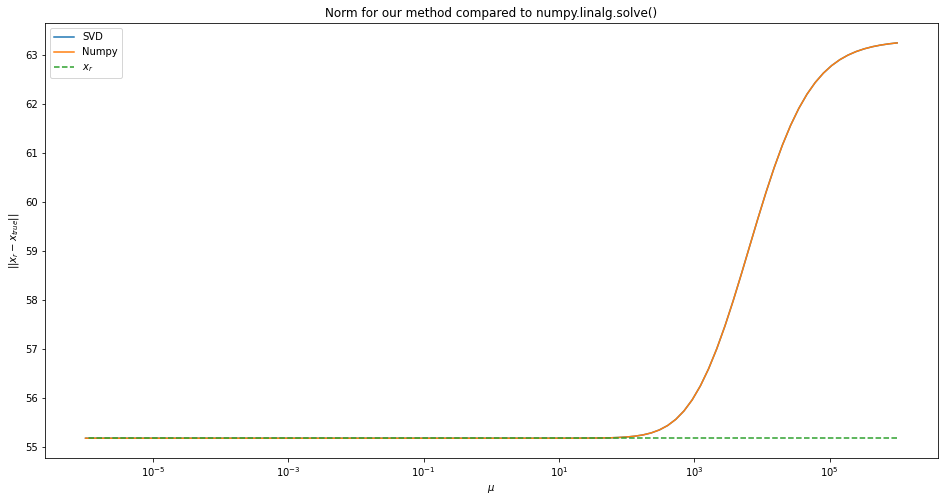

In [22]:
# Calculate error for SVD
norms_SVD = []
for x_r in x_r_SVD.T:
    norms_SVD.append(np.linalg.norm(x_r-X_2[:,0]))
    
# Calculate error for numpy.linalg.solve
norms_NP = []
for x_r in x_r_NP.T:
    norms_NP.append(np.linalg.norm(x_r-X_2[:,0]))

# Plot
plt.figure(figsize=(16,8))
plt.plot(mu_array_SVD, norms_SVD)
plt.plot(mu_array_NP, norms_NP)
plt.plot(mu_array_SVD, [norms_SVD[-1] for i in range(len(mu_array_SVD))],"--")
plt.legend(['SVD', 'Numpy', '$x_{r}$'])
plt.semilogx()
plt.title("Norm for our method compared to numpy.linalg.solve()")
plt.xlabel("$\mu$")
plt.ylabel("$\||x_r-x_{true}\||$")
plt.show()

The norm for both methods are basically identical. For all $\mu<10^{-1}$, the norm remains stable at a low level, which shows that a low $\mu$ results in a low error compared to the value of $\boldsymbol{x}_{true}$. Thus, low values of $\mu$ results in the best reconstruction of $\boldsymbol{x}_{true}$. The reason for this can be seen in the definition of our Tikhonov optimization problem, which was to minimize $T(\boldsymbol{x})=\|A\boldsymbol{x}-\boldsymbol{y}\|^2+\mu\|\boldsymbol{x}\|^2$. As $\mu$ gets smaller, the problem is dominated more and more by $\|A\boldsymbol{x}-\boldsymbol{y}\|^2$, which we know is minimized when $\boldsymbol{x_r}$ is closer to $\boldsymbol{x_{true}}$, as we defined $\boldsymbol{y}$ as $\boldsymbol{y}=A\boldsymbol{x_{true}}$. For large values of $\mu$, however, the problem is dominated by $\mu\|\boldsymbol{x}\|$, meaning that the "best" solution now becomes the $\boldsymbol{x_r}$ with the lowest norm, so the solution approaches $\boldsymbol{x}=\vec{0}$ as $\mu\rightarrow \infty$. We should be able to see this by printing the norm of $x_r$ where $\mu=10^6$ and $\mu = 10^{-6}$:

In [23]:
print(np.linalg.norm(x_r_SVD.T[0]))  # Mu = 10^6
print(np.linalg.norm(x_r_SVD.T[-1])) # Mu = 10^-6

0.15005960158293416
31.032564185061403


As expected, the norm is close to zero when $\mu$ is large, and the norm is higher when $\mu$ is small.

***
### Task 3)

Now we look at a so-called single channel source separation problem, where we have a vector $y$ containing a picture where a "0" and a "1" is mixed together, which we want to separate into two pictures $u$ and $v$ containing the "0" and the "1", respectively. We start off by looking at a matrix $B=I-WW^T$, and then continue to do the picture separation. Here, $W$ is a basis for a picture, and we first wish to show that $B$ is a projection matrix.

#### a)

We have $B=I-WW^T$. $W$ has pairwise orthogonal column vectors, meaning that $\langle w_i^T,w_j\rangle=\delta_{ij}$, where $\delta_{ij}$ is the Kronecker delta.

For an arbitrary projection matrix $P$, we have $P^2=P$. By looking at the eigenvalues and eigenvectors of $P$, we find that

$$
P\boldsymbol{x}=\lambda\boldsymbol{x}\\
P^2\boldsymbol{x}=P(P\boldsymbol{x})=P(\lambda\boldsymbol{x})=\lambda^2\boldsymbol{x}\\
\Rightarrow \lambda^2=\lambda\Rightarrow \lambda = 0 \vee \lambda = 1
$$

So projection matrices can only have eigenvalues 0 and 1. Looking at $B^2$,

$$
B^2 = (I-WW^T)^2 = I-2WW^T+WW^TWW^T
$$

Assuming $W^TW$ is a projection since $W^T$ is orthogonal, $W^TW$ can only have eigenvalues 0 and 1. Looking at $W^TW$, we see that

$$
W^TW=
\begin{bmatrix}
\langle w_1^T,w_1\rangle&\dots&\langle w_1^T,w_n\rangle \\
\vdots&\ddots&\vdots \\
\langle w_n^T,w_1\rangle&\dots&\langle w_n^T,w_n\rangle
\end{bmatrix}
=
\begin{bmatrix}
1&0&\dots&0 \\
0&1&\dots&0\\
\vdots&\vdots&\ddots&\vdots \\
0&0&\dots&1
\end{bmatrix}
=I
$$



Therefore we get

$$
B^2=I-2WW^T+WW^T=I-WW^T=B \quad \square
$$

This means that $B$ is a projection matrix, and all its eigenvalues are either 0 or 1. Thus, if $B$ is symmetric, it is symmetric positive semi-definite. As we see by looking at $B^T$,

$$
B^T=(I-WW^T)^T=I^T-(WW^T)^T=I-WW^T=B,
$$

which means that B is symmetric positive semi-definite.
***

#### b)

For the minimal norm solution of the single channel source separation, the problem becomes

$$
\underset{x}{\text{arg min}}\hspace{0.1cm} \frac{1}{2}\boldsymbol{x}^TB\boldsymbol{x},\hspace{0.5cm}\text{s.t.}\hskip{0.1cm}A\boldsymbol{x}=\boldsymbol{y}
$$

where we define

$$
B=\begin{bmatrix}B_0&0\\0&B_1\end{bmatrix},\quad B_0 = I-W_0W_0^T,\quad B_1=I-W_1W_1^T,\quad \boldsymbol{x}=\begin{bmatrix}\boldsymbol{u}\\\boldsymbol{v}\end{bmatrix}, \quad A = [I\quad I].
$$

##### 1)

The Lagrange function for our minimization problem is $\mathcal{L}(x,\lambda)=\frac{1}{2}x^TBx+\lambda^T(Ax-y)$. The solution is where $\nabla_x \mathcal{L}(x,\lambda)=\nabla_\lambda \mathcal{L}(x,\lambda) = 0$. 

$$
\begin{aligned}
\nabla_x \mathcal{L}(x,\lambda)&=\nabla_x(\frac{1}{2}x^TBx+\lambda^T(Ax-y))=\nabla_x(\frac{1}{2}x^TBx)+\nabla_x(\lambda^T(Ax-y)) = 0\\
\nabla_\lambda\mathcal{L}(x,\lambda)&=\nabla_\lambda(\frac{1}{2}x^TBx+\lambda^T(Ax-y))=\nabla_\lambda(\lambda^T(Ax-y))=0
\end{aligned}
$$

From exercise 2 we know that $\nabla_x(\frac{1}{2}x^TBx)=(\frac{1}{2}B^T+\frac{1}{2}B)x$, and from task 1)c) we know that $\nabla_x(\lambda^T(Ax-y))=A^T\lambda$ and that $\nabla_\lambda(\lambda^T(Ax-y))=Ax-y$. This means that we end up with the system

$$
\begin{aligned}
\nabla_x \mathcal{L}(x,\lambda)&=(\frac{1}{2}B^T+\frac{1}{2}B)x+A^T\lambda=0\\
\nabla_\lambda\mathcal{L}(x,\lambda)&=Ax-y=0\Rightarrow Ax+0\cdot \lambda = y,
\end{aligned}
$$

which in matrix form can be written as

$$
\begin{bmatrix}
\frac{1}{2}B^T+\frac{1}{2}B&A^T\\A&0
\end{bmatrix}
\begin{bmatrix}
x\\\lambda
\end{bmatrix}
=
\begin{bmatrix}
0\\y
\end{bmatrix}
$$

From our proof in 3)a), we know that $B_0$ and $B_1$ are symmetric, so $\frac{1}{2}B_i^T+\frac{1}{2}B_i=B_i$. Using the earlier definitions $B=\begin{bmatrix}B_0&0\\0&B_1\end{bmatrix}$, $A= [I\quad I]$, and $x=\begin{bmatrix}u\\v\end{bmatrix}$ the system becomes

$$
\begin{bmatrix}
\frac{1}{2}B_0^T+\frac{1}{2}B_0&0&I\\
0&\frac{1}{2}B_1^T+\frac{1}{2}B_1&I\\
I&I&0
\end{bmatrix}
\begin{bmatrix}
u\\v\\\lambda
\end{bmatrix}
=
\begin{bmatrix}
0\\0\\y
\end{bmatrix}
$$

$$
\begin{bmatrix}
I-W_0W_0^T&0&I\\
0&I-W_1W_1^T&I\\
I&I&0
\end{bmatrix}
\begin{bmatrix}
u\\v\\\lambda
\end{bmatrix}
=
\begin{bmatrix}
0\\0\\y
\end{bmatrix}
$$

##### 2)

Now we proceed to eliminating $\lambda$ by subtracting the second equation from the first. Then, using the third equation, $u+v=y\Rightarrow v=y-u$, we get that

$$
\begin{aligned}
(I-W_0W_0^T)u + I\lambda-(I-W_1W_1^T)v-I\lambda&=0\\
(I-W_0W_0^T)u&=(I-W_1W_1^T)v\\
(I-W_0W_0^T)u&=(I-W_1W_1^T)(y-u)\\
(2I-W_0W_0^T-W_1W_1^T)u&=(I-W_1W_1^T)y
\end{aligned}
$$

This shows that the system can be written as $Cu=d$, with $C=2I-W_0W_0^T-W_1W_1^T$ and $d = (I-W_1W_1^T)y$. After finding $u$, we can then use $v = y-u$ to calculate the other "picture".

##### 3)

To solve the equation $Cu=d$, we must first import the necessary matrices, i.e. the bases $W_0$ and $W_1$, and 100 test-pictures.

In [24]:
Mixes = np.load('mixed.npy')
W0 = np.load('W0.npy')
W1 = np.load('W1.npy')

The test-pictures are now columns of `Mixes`. Each picture is a mix between a "1" and a "0", and our goal is to separate the two numbers into two separate pictures, where `U` contains all pictures of zeroes and `V` contains all pictures of ones. Since separating the pictures means solving $Cu=d$ and $v=y-u$, we can either use QR-decompositioning or `numpy.linalg.solve()`. I would like to test both methods and see which one is the fastest, and to do so I create the function `solve_minimal_norm()`, with an option to use either QR or `np.linalg.solve`. 

The advantage of using QR is that we only need to decompose $C$ once, and the downside is that the one-time computation requires heavy calculations. `numpy.linalg.solve()`, however, does not require any pre-calculations, but takes longer to calculate each picture as it cannot exploit orthogonal or triangular matrices, which QR-decompositioning can. Thus, the QR method should be slower for one picture, but faster for many pictures. Since  we are to solve for 100 pictures, I expect the QR-solver to be faster than `numpy.linalg.solve()`.

In the implementation of the QR-decompositioning I use `np.linalg.qr()` instead of my own implementation of Gram-Schmidt. This is to make the comparison between QR and `np.linalg.solve()` as fair as possible, as numpy-functions tend to be very fast. I do, however, use the `solve_QR()`-function from task 2.

In [25]:
def solve_minimal_norm(Mixes, W0, W1, QR = True):
    """
    Function:
        Uses global, imported variables W0, W1 to decompose "picture"-
        vectors in "Mixes" into separate picture-vectors u and v.
        
    Input:
        Mixes: matrix containing "pictures" as columns
        W0: Matrix, the basis of "0"
        W1: Matrix, the basis of "1"
        QR: Default value True. Whether or not it should use QR-decompositioning.
    Output:
        U: Matrix containing "decomposed" zeroes
        V: Matrix containing "decomposed" ones
    
    """
    # Define necessary matrices and lists
    I = np.eye(np.size(W0[:,0])) # Identity matrix
    C = 2*I-W0@W0.T-W1@W1.T      # Matrix defined in 3)b)2)
    if QR:
        Q,R = np.linalg.qr(C)    # Only perform QR-decomp. if QR = True
    
    # Lists to contain all pictures u and v
    U = []
    V = []
    
    # Iterate through each picture
    for i, picture in enumerate(Mixes.T):
        d = (I-W1@W1.T)@picture
        
        # Use solve_QR() or use np.linalg.solve().
        if QR:
            u = solve_QR(Q,R,d)
        else:
            u = np.linalg.solve(C,d)
        U.append(u)
        V.append(picture - u)
        
    return np.array(U).T, np.array(V).T

***
#### d)

Now we test how long it takes to separate the pictures with `solve_minimal_norm()`, both using QR-decompositioning and `np.linalg.solve()`.

In [26]:
%%timeit
U, V = solve_minimal_norm(Mixes, W0, W1, QR = True)

191 ms ± 3.61 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
%%timeit
U, V = solve_minimal_norm(Mixes, W0, W1, QR = True)

192 ms ± 5.43 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


As we can see, using QR-decompositioning is much faster than using `np.linalg.solve()`. And this was only for 100 pictures, meaning that if we had more, the difference would be even larger. Nonetheless, both methods were fast, taking less than a second for the 100 pictures.

Next, let us see what the decompositions look like. We found in task 1 that there essentially is no difference in numerical accuracy between the two methods, so here we only look at examples from our QR-decompositioning. 

In [28]:
U, V = solve_minimal_norm(Mixes, W0, W1, QR = True)

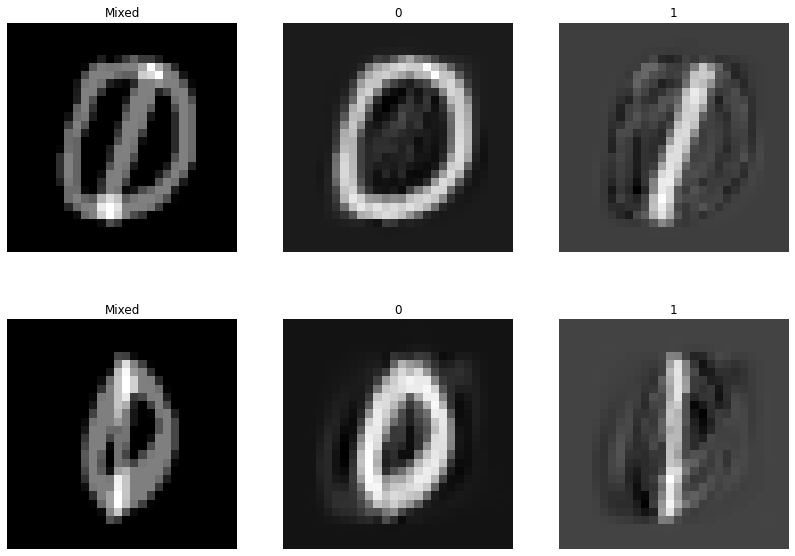

In [29]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3)
fig.set_figheight(10)
fig.set_figwidth(14)

# Add titles
ax1.set_title("Mixed")
ax2.set_title("0")
ax3.set_title("1")
ax4.set_title("Mixed")
ax5.set_title("0")
ax6.set_title("1")

# Show plots
ax1.imshow(Mixes[:,1].reshape((28,28)), cmap = 'gray')
ax2.imshow(U[:,1].reshape((28,28)), cmap = 'gray')
ax3.imshow(V[:,1].reshape((28,28)), cmap = 'gray')
ax4.imshow(Mixes[:,-1].reshape((28,28)), cmap = 'gray')
ax5.imshow(U[:,-1].reshape((28,28)), cmap = 'gray')
ax6.imshow(V[:,-1].reshape((28,28)), cmap = 'gray')

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')
ax6.axis('off')
plt.show()

We see that the algorithm is able to separate the mixed image into a 0 and a 1. It is, however, some clear signs of the opposite number in each picture, which shows that the separation is not perfect. Especially in the two examples of ones, we can see a dark circle surrounding the number. Regardless, it is safe to say that the approach using QR-decompositioning works for single channel source separation.

The main drawback of this method is the difficulty of finding bases for the pictures, which we could not do ourselves for this project. Thus, if we had many different types of pictures we wanted to separate, finding bases for each picture could become a difficulty.

### Conclusion

We have now looked at the minimal norm and Tikhonov regularization approaches of solving underdetermined systems of equations, through the use of QR-decompositioning, `numpy.linalg.solve()` and singular value decompositioning. We found that factoring the matrix $A$ into new matrices by using QR-decompositioning or SVD results in solving the equation faster than `numpy.linalg.solve()`, but at the cost of more time-demanding calculations that has to be done before the equations can be solved. Then, we used the minimal norm solution to perform single channel source separation, and to separate a "mixed" picture into two separate ones, for which we can conclude that QR-decompositioning worked well.